### Author : Dinesh Kondra
### Data science and Business Analytics Intern
### The Sparks Foundation GRIP
### Batch : November 2020
### Task 2
### Prediction using Unsupervisied Learning

#### [K-Means Clustering on Iris Dataset]

#### Importing necessary packages

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn import datasets

#### Loading Iris Dataset

In [81]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [82]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [83]:
cols = iris_df.columns
cols

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [84]:
x_sepal = iris_df.iloc[:,0].values
y_sepal = iris_df.iloc[:,1].values

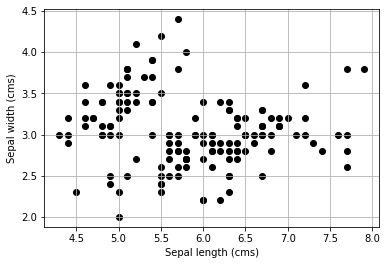

In [85]:
plt.scatter(x_sepal,y_sepal,color='black')
plt.xlabel('Sepal length (cms)')
plt.ylabel('Sepal width (cms)')
plt.grid()

In [86]:
x_petal = iris_df.iloc[:,2].values
y_petal = iris_df.iloc[:,3].values

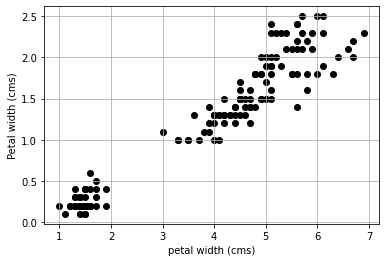

In [87]:
plt.scatter(x_petal,y_petal,color='black')
plt.xlabel('petal width (cms)')
plt.ylabel('Petal width (cms)')
plt.grid()

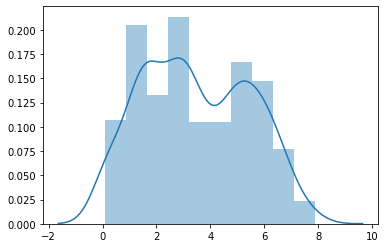

In [88]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values
sns.distplot(x)

### Feature Exploration
#### [Using Pearson Correlation]

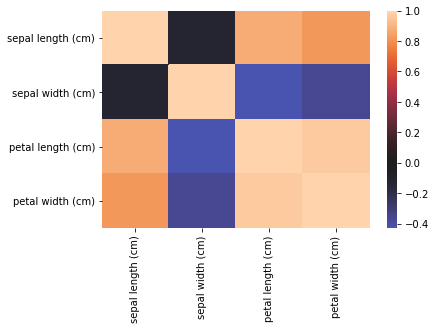

In [89]:
from scipy.stats import pearsonr
corre=iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)']].corr()
sns.heatmap(corre, 
            xticklabels=corre.columns.values,
            yticklabels=corre.columns.values,
            center=0)

##### From the plot, we can deduce that only [petal length(cm)] and [petal width(cm)] are better features to proceed. Only those features appear to be any color other than black (correlation = 0).

### Finding optimum number of clusters for K-Means Clustering

In [90]:
X = iris_df.iloc[:, [0, 1, 2, 3]].values
from sklearn.cluster import KMeans
wcss = []   # Within cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

#### Notice that if we initialize randomly, it would be potentially problematic because we might get different clusters every time. So, to solve this problem of random initialization, we have used K-Means++ to choose the initial values, or the initial cluster centroids, for K-Means.

 
 #### [inertia is the sum of squared distances from the centroid with in a cluster]

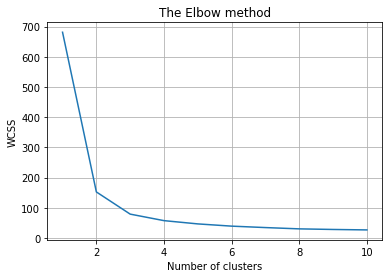

In [91]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.grid()
plt.show()

####  "The Elbow Method" 
#### The cluster value where this decrease in inertia value becomes constant can be chosen as the right cluster value for our data.
####  So we infer from the plot, the optimum number of clusters is 3.

### K-Means Clustering

In [92]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

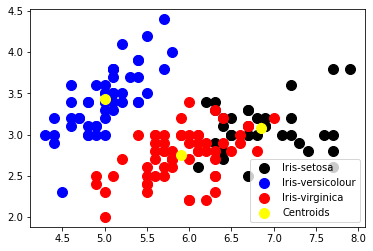

In [93]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'black', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'red', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()